- Pre Pruning and Hyperparameter Tuning 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
dataset = load_diabetes()

In [5]:

dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
print(dataset['feature_names'])
print(dataset['DESCR'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, bloo

- Splitting w.r.t Features

In [ ]:
# Independent Features
x= pd.DataFrame(dataset['data'],columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [ ]:
# Dependent Features 
y = dataset['target']

In [15]:

from sklearn.model_selection import train_test_split
#Train-Test Data Splitting 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)


In [21]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


<Axes: >

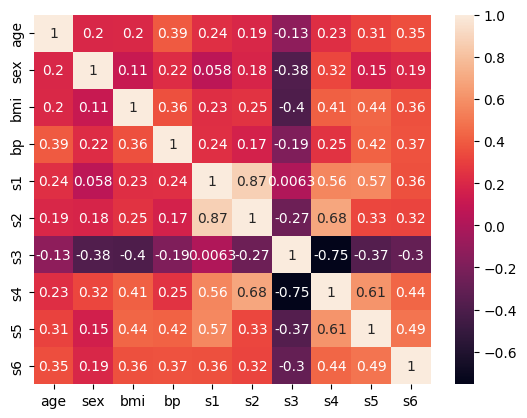

In [24]:
corr = x_train.corr()
sns.heatmap(corr , annot =True)

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
regressor = DecisionTreeRegressor() 

In [30]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

[Text(0.6791526625667429, 0.975, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.476285397597254, 0.925, 'x[2] <= 0.005\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.5777190300819984, 0.95, 'True  '),
 Text(0.3740524885583524, 0.875, 'x[7] <= 0.031\nsquared_error = 2592.764\nsamples = 148\nvalue = 107.615'),
 Text(0.30226210907704043, 0.825, 'x[0] <= 0.022\nsquared_error = 2220.402\nsamples = 127\nvalue = 101.008'),
 Text(0.2385821891685736, 0.775, 'x[3] <= 0.115\nsquared_error = 2062.541\nsamples = 98\nvalue = 93.898'),
 Text(0.2355310831426392, 0.725, 'x[8] <= -0.009\nsquared_error = 1928.519\nsamples = 97\nvalue = 92.639'),
 Text(0.1976067887109077, 0.675, 'x[2] <= 0.003\nsquared_error = 1459.603\nsamples = 78\nvalue = 87.577'),
 Text(0.1945556826849733, 0.625, 'x[3] <= -0.001\nsquared_error = 1312.285\nsamples = 77\nvalue = 86.117'),
 Text(0.1595156369183829, 0.575, 'x[3] <= -0.007\nsquared_error = 1289.903\nsamples = 66\nv

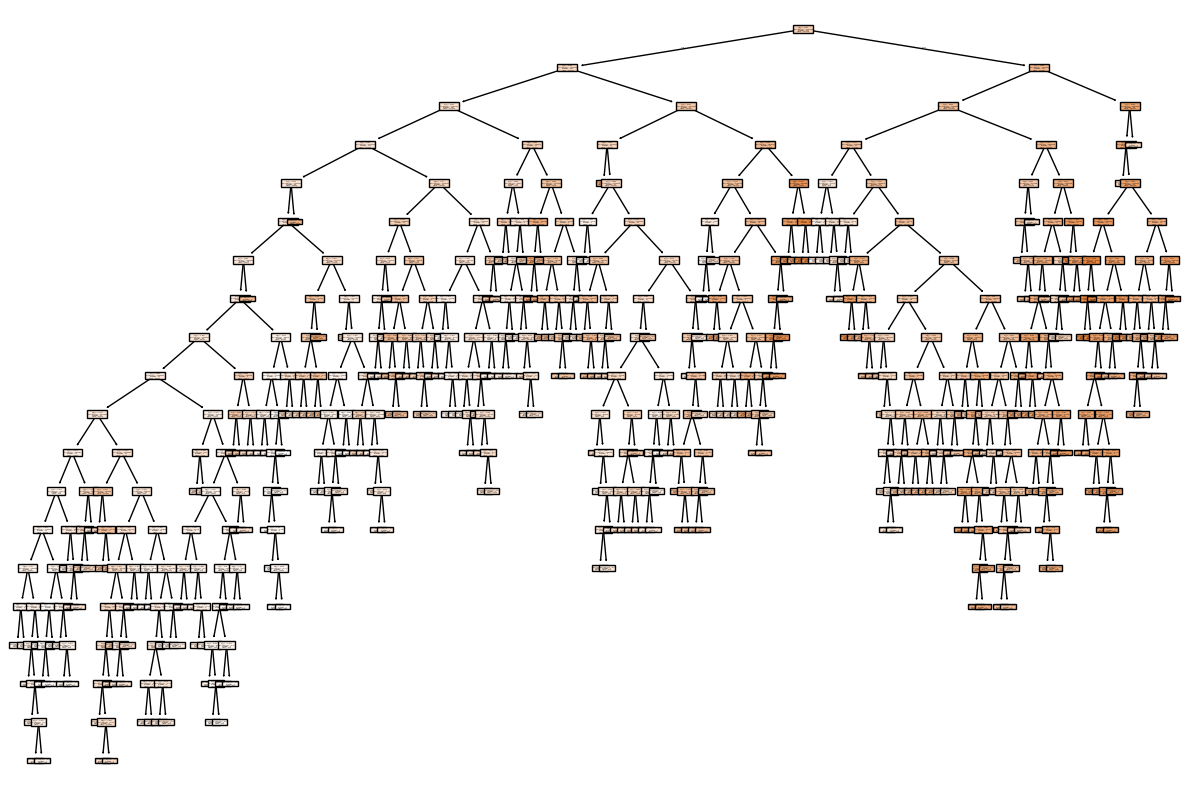

In [32]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled = True)

Hyperparameter Tuning 

In [33]:
param ={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25] ,
    'max_features':['auto','sqrt','log2'],
}

In [34]:
from sklearn.model_selection import GridSearchCV 

In [35]:
treemodel = DecisionTreeRegressor()

In [36]:
grid = GridSearchCV(regressor , param_grid=param , cv = 5 , scoring= 'neg_mean_squared_error')

In [37]:
import warnings 
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [38]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [39]:
grid.best_score_

np.float64(-3951.594498324647)

In [40]:
y_pred= grid.predict(x_test)

In [42]:
selectmodel = DecisionTreeRegressor(criterion='friedman_mse' , max_depth = 3 , max_features = 'sqrt',splitter='best')

In [43]:
selectmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

[Text(0.5, 0.875, 'x[8] <= 0.022\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[9] <= -0.032\nfriedman_mse = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 0.006\nfriedman_mse = 2579.096\nsamples = 63\nvalue = 104.825'),
 Text(0.0625, 0.125, 'friedman_mse = 1632.167\nsamples = 52\nvalue = 93.788'),
 Text(0.1875, 0.125, 'friedman_mse = 3757.455\nsamples = 11\nvalue = 157.0'),
 Text(0.375, 0.375, 'x[2] <= 0.005\nfriedman_mse = 4431.842\nsamples = 142\nvalue = 131.704'),
 Text(0.3125, 0.125, 'friedman_mse = 2953.981\nsamples = 97\nvalue = 114.536'),
 Text(0.4375, 0.125, 'friedman_mse = 5612.605\nsamples = 45\nvalue = 168.711'),
 Text(0.75, 0.625, 'x[3] <= 0.058\nfriedman_mse = 4163.865\nsamples = 104\nvalue = 210.481'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.015\nfriedman_mse = 4069.812\nsamples = 84\nvalue = 199.595'),
 Text(0.5625, 0.125, 'friedman_mse = 2661.307\nsamples = 

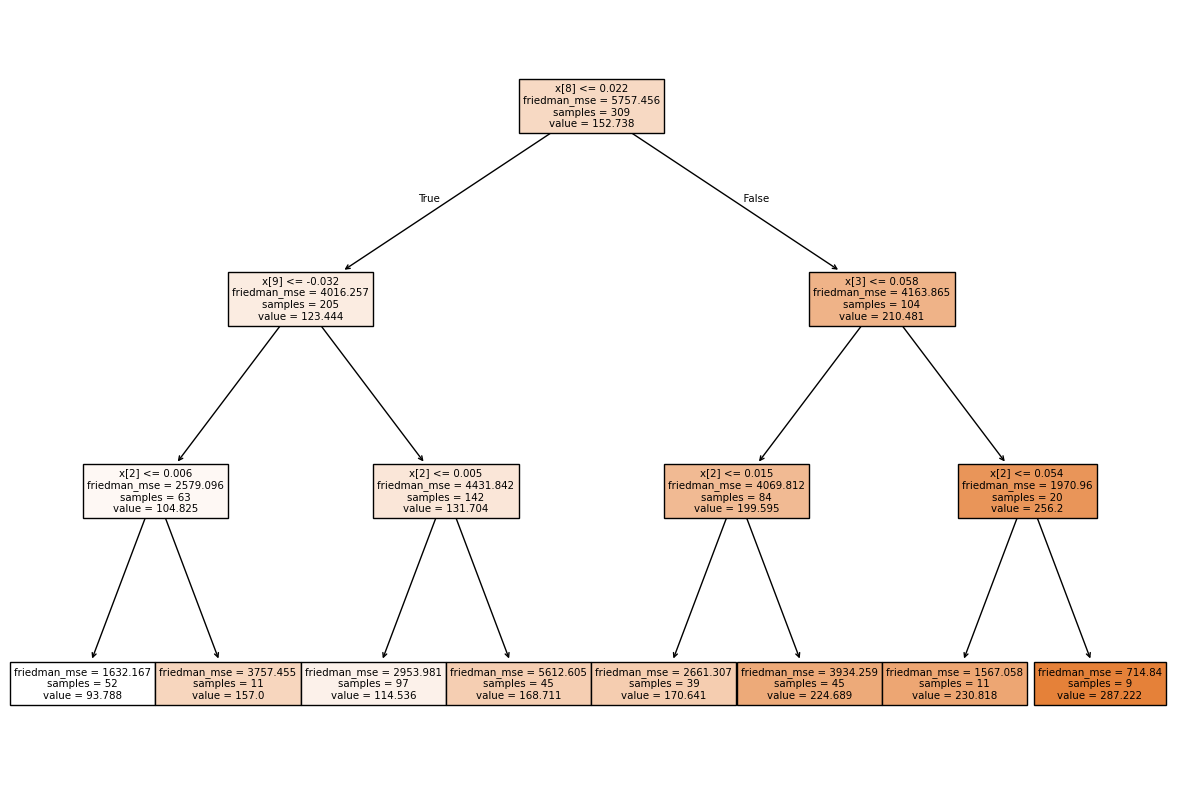

In [45]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled = True)